<a href="https://colab.research.google.com/github/JuannGlezz/Codigo-aprender/blob/main/TitanicRegLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded=files.upload()

Saving tested.csv to tested (1).csv


In [5]:
import pandas as pd
import numpy as np
df=pd.DataFrame()
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:

# Renombrar la columna "Survived" a "survived" para que sea consistente
df = df.rename(columns={"PassengerId":"IdPasajero","Survived": "Supervivientes","Pclass":"Clase","Name":"Nombre","Sex":"Sexo", "Age":"Edad","sibsp": "Hermanos", "Cabin": "Cabina","Embarked":"Embarco"})
df=df.dropna()
# Mostrar las primeras filas del nuevo DataFrame
df.head()

,IdPasajero,Supervivientes,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Fare,Cabina,Embarco
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


([<matplotlib.axis.YTick at 0x7e80db7959c0>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14'),
  Text(0, 16, '16'),
  Text(0, 18, '18'),
  Text(0, 20, '20'),
  Text(0, 22, '22'),
  Text(0, 24, '24'),
  Text(0, 26, '26'),
  Text(0, 28, '28'),
  Text(0, 30, '30'),
  Text(0, 32, '32'),
  Text(0, 34, '34'),
  Text(0, 36, '36'),
  Text(0, 38, '38'),
  Text(0, 40, '40'),
  Text(0, 42, '42'),
  Text(0, 44, '44'),
  Text(0, 46, '46'),
  Text(0, 48, '48')])

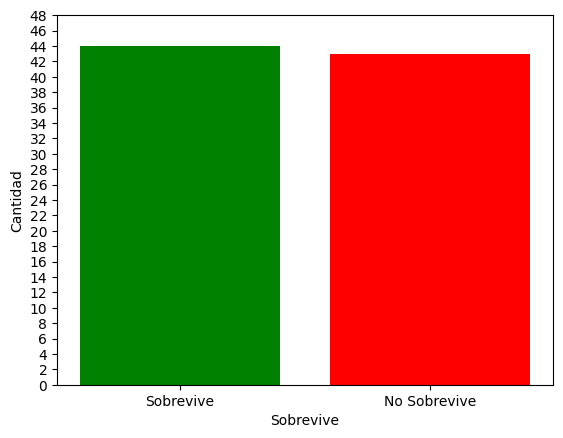

In [7]:
import matplotlib.pyplot as plt
sobrevive=df["Supervivientes"].value_counts()
plt.bar(["Sobrevive","No Sobrevive"],sobrevive,color=['green','red'])
plt.xlabel('Sobrevive')
plt.ylabel('Cantidad')
plt.yticks(range(0, 50, 2))
#Hubo mas gente que sobrevivió que de la que no

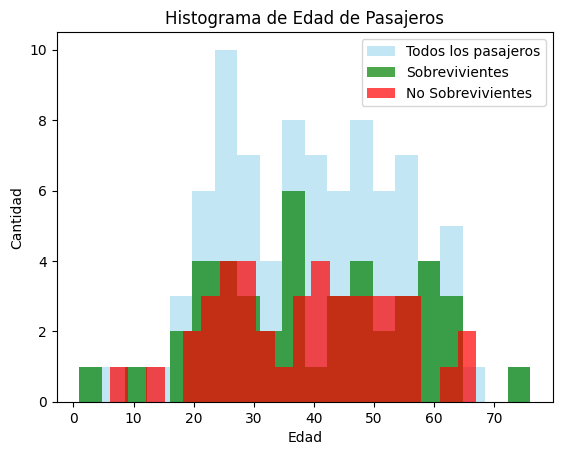

In [8]:
# Filtrar datos de edad para sobrevivientes y no sobrevivientes
Edad_survived = df[df['Supervivientes'] == 1]['Edad']
Edad_not_Supervivientes = df[df['Supervivientes'] == 0]['Edad']

# Graficar histograma de edad de pasajeros
plt.hist(df['Edad'], bins=20, color='skyblue', alpha=0.5, label='Todos los pasajeros')

# Graficar histograma de edad de sobrevivientes y no sobrevivientes
plt.hist(Edad_survived, bins=20, color='green',alpha=0.7,  label='Supervivientes')
plt.hist(Edad_not_Supervivientes, bins=20, color='red', alpha=0.7, label='No Supervivientes')

plt.title('Histograma de Edad de Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend()
plt.show()
#Vemos que  la mayoría tenían unos 25 años y los que más sobrevivieron tenían 35 años, los que más murieron 25,28,42 años

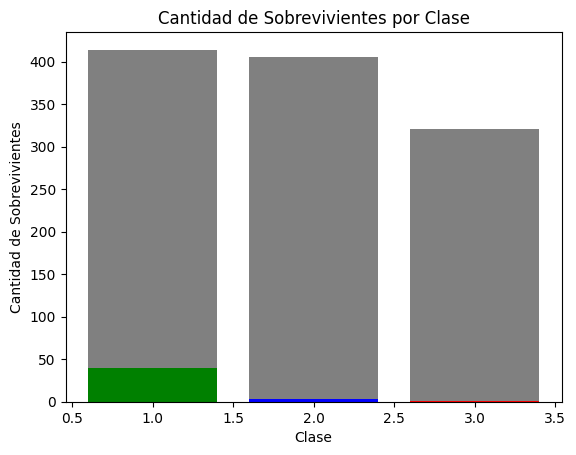

In [47]:
survived_counts = df[df['Supervivientes'] == 1]['Clase'].value_counts().sort_index()

# Grafico
plt.bar(df['Clase'].values, df['Clase'].index,color='grey')
plt.bar(survived_counts.index, survived_counts.values, color=['green','blue','red'])
plt.title('Cantidad de Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Sobrevivientes')
plt.show()
#Como vemos los que más sobreviven son de la clase 1

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Definir características (X) y variable objetivo (y)
X = df[['Clase', 'Sexo', 'Edad', 'SibSp', 'Parch', 'Fare', 'Embarco']]
y = df['Supervivientes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir transformadores para las características
numeric_features = ['Clase', 'Edad', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sexo', 'Embarco']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

df['Predicciones'] = model.predict(X)

# Imprimir el DataFrame con las predicciones
df.head(20)

Accuracy: 1.0


,IdPasajero,Supervivientes,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Fare,Cabina,Embarco,Predicciones
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0
34,926,0,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C,0
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,1
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C,0
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,1
50,942,0,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S,0
